In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import uszipcode
from __future__ import print_function
from uszipcode import SearchEngine
from collections import Counter
import mpld3 
mpld3.enable_notebook()
import matplotlib.pyplot as plt
search = SearchEngine()
import os

os.chdir(".../projects/DS5/Task1"))

['default of credit card clients.csv', 'SBAnational.csv', 'Should This Loan be Approved or Denied A Large Dataset with Class Assignment Guidelines.pdf']


In [2]:
%config IPCompleter.greedy=True

In [86]:
credit = pd.read_csv('SBAnational.csv', header ='infer')

/Users/mirbek/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [87]:
#Quick overview of our Dataset
credit.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [242]:
#Deleting duplicates if any
credit = credit.drop_duplicates(keep = 'first')
#Shape of the data 899164 rows and 27 columns
credit.shape

In [88]:
#Observing the types of variables
credit.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [89]:
print(credit.dtypes.index)

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')


In [292]:
#Summary of data frame (count, mean, standart deviation, min, quartiles, max)
credit.describe()

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,8.991640e+05,899164.000000,899164.000000,899164.000000,899164.000000,899028.000000,899164.000000,899164.000000,899164.000000,899164.000000
mean,4.772612e+09,53804.391241,398660.950146,110.773078,11.411353,1.280404,8.430376,10.797257,2753.725933,0.757748
std,2.538175e+09,31184.159152,263318.312759,78.857305,74.108196,0.451750,236.688165,237.120600,12758.019136,0.646436
min,1.000014e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.589758e+09,27587.000000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.361439e+09,55410.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,6.904627e+09,83704.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000
max,9.996003e+09,99999.000000,928120.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000


In [90]:
#NA OBSERVATIONS. Lot of NAs
credit.isnull().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [91]:
                                                    #####FIRST Dealing with NAs.##### 
# There 4 columns belongs to Borrower information: Name, City, State and Zip.
#Name is unique and useless and we can drop entire column.
credit = credit.drop(axis =1, columns = ['Name'])
#Next City and State. As you can see there are no NAs in Zip, so we can easily impute City and State uzing Zip values
#Creating condition to our loop
cond = (credit.City.isnull()|credit.State.isnull())
missing_rows = credit[cond].index
#I will go through loop and using Index number of missing rows, I will impute City and State using zearch.by_zipcode function
for i in missing_rows:
    zipcode = search.by_zipcode(credit.iloc[i,3]) # 3 is corresponds to Zip code
    credit.iloc[i,1] = zipcode.major_city # 1 -> City
    credit.iloc[i,2] = zipcode.state # 2 -> State
#Check how our NA's was imputed. We still have 4 NAs. I have looke through of them. One zip code = 0. 
#and other 3 are not in list of search.by_zipcode function. I think we can delete this rows.
credit.isnull().sum()

LoanNr_ChkDgt             0
City                      4
State                     4
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [92]:
#Next features with lot of NA's are Bank and BankState. 
#I would like to check if State of borrower = State of Bank. 
#If so we can just delete one of them.
equal = 0
non_equal = 0
for i in credit.index:
    if credit.State[i] == credit.BankState[i]:
        equal = equal + 1
    else:
        non_equal = non_equal +1
print(equal, non_equal)
# Sad. As you can see below it's not correct assumption 473949 cases are equal and 425215 are not.

473949 425215


In [93]:
#Since our goal is to define default case or not, we will check are there default cases in rows where we don't know
#the Bank Name and Bank State. 
cond_1 = credit.Bank.isnull()|credit.BankState.isnull()
missing_rows_1 = credit[cond_1].index
yes = 0
no = 0
for i in missing_rows_1:
    if credit.MIS_Status[i] == 'CHGOFF':
        yes = yes+1
    else:
        no = no +1
print(yes,no)
#Not bad, 72 cases against 1494. I will build a small model to predict the State of the Bank. 
#And impute Bank name according highest to the state.
#I will delete later 1494 rows with not default cases, since we have already imbalanced data.

72 1494


In [94]:
#Feature - 'ChgOffDate' corresponds to the date when a loan was declared to be in default. 
#I made little investigation about ChgOffDate feature we have 739609 paid cases and we have 736465 NA's in this feature 
#seems like if credit paid there is NA in this featue. default date = default case.
#So we will just drop this feature.
credit = credit.drop(axis =1, columns = ['ChgOffDate'])

In [9]:
#Next I want clean very quick our dependent variable - MIS_Status drop NA's and change dtype. 
#I need it for visualization in further Data Exploration process.
#And of course 4 rows in City and State column with NAs
credit = credit.dropna(axis =0, subset=['City','State','MIS_Status'])
#I wan't to change the dtype of several features firstly. It will help us to plot some intersting things.
#I will start from our response variable MIS_Status.
#PIF -  Paid in full, CHGOFF - Loan status charged off 
#First of all I would like to change dtype(object) to numerical (1 and 0) 
#1 - grant a loan (low risk of default), 0 - not grant a loan (high risk of default)
loan_status = {'P I F': 1,'CHGOFF': 0} 
credit.MIS_Status = [loan_status[item] for item in credit.MIS_Status] 

Counter(credit.MIS_Status).keys() # unique values 
Counter(credit.MIS_Status).values() # count values 739609 = "1" against 157556 = "0"

dict_values([739607, 157556])

In [10]:
#I want very fast change the dtype of Currency features.
#Because I want to plot and see the corealation of currency to our target value.
currency = [19,20,22,23,24]
for i in currency:
    credit[credit.columns[i]] = credit[credit.columns[i]].replace('[\$,]', '', regex=True).astype(float)

In [11]:
#Looks good.
credit.isnull().sum()

LoanNr_ChkDgt           0
City                    0
State                   0
Zip                     0
Bank                 1505
BankState            1512
NAICS                   0
ApprovalDate            0
ApprovalFY              0
Term                    0
NoEmp                   0
NewExist              134
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr            4520
LowDoc               2578
DisbursementDate     2175
DisbursementGross       0
BalanceGross            0
MIS_Status              0
ChgOffPrinGr            0
GrAppv                  0
SBA_Appv                0
dtype: int64

In [336]:
#Next feature is New Exist we have 134 NAs
Counter(credit.NewExist).keys() # unique values

dict_keys([2.0, 1.0, 0.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [378]:
Counter(credit.NewExist).values() # count values 
#In fact we have more NAs than 136. 
#252559 = New business
#64443 = Existing business
#1027 = "0" whatever it means
#134 = nan as we can see from previous output

dict_values([252559, 643443, 1027, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [18]:
#We have feature 'RetainedJob' - According to documentation it is a number of jobs retained. I can assume that if loan
# is going to retain jobs it is existing business.
# I will create condition and itirate through loop to 
#asign new value "1" which is Existing business to those rows where Retained Job is >= 1
cond_2 = credit[(credit['NewExist'] == 0) & (credit['RetainedJob'] >=1)].index
for i in cond_2:
    credit.NewExist[i] = 1

In [19]:
#Now we will do same thing with another condition is null and Retained Job >=1
#More 115 rows to be changed to "NewExist = 0"
cond_3 = credit[(credit.NewExist.isnull()) & (credit['RetainedJob'] >=1)].index
for i in cond_3:
    credit.NewExist[i] = 1

In [20]:
#Not bad now we have 874 rows = 0 and 19 NAs.
#I will check if there default cases inside in rows.
credit[(credit['NewExist'] == 0) & (credit['MIS_Status'] == 0)] #60 rows
credit[(credit.NewExist.isnull()) & (credit['MIS_Status'] == 0)] #1 row
#Our goal to impute accurately 61 row in NewExist, and we can delete others.

,LoanNr_ChkDgt,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,...,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
433834,4203385009,SITKA,AK,99835,NORTHRIM BANK,AK,561499,11-Aug-10,2010,82,...,2,N,N,11-Aug-10,15000.0,0.0,0,10718.0,15000.0,12750.0


In [21]:
#Ok, we will continue our investigation.
#Intersting column - "FranchiseCode":
#Nofranchise = 0 or 1
#Franchise code = other numbers
#My assumption if Franchise code != 0 & 1, may be it is New Business, not existing.
Counter(credit.FranchiseCode).keys() #51732 Franchise Loans

dict_keys([1, 0, 15100, 19755, 10656, 22470, 16267, 21425, 3490, 66320, 77175, 21400, 10495, 50949, 20550, 950, 78760, 84025, 50564, 68060, 10676, 10397, 23997, 51570, 70405, 81612, 36002, 16920, 67759, 81965, 39598, 75982, 90725, 9802, 17205, 23379, 80600, 22475, 10602, 78325, 401, 40472, 73675, 17998, 39700, 21420, 23000, 72590, 79140, 68021, 65925, 71456, 10622, 8380, 44081, 10528, 6410, 52000, 83882, 21780, 10734, 60227, 38510, 77174, 89769, 75385, 10615, 10556, 9050, 42520, 68020, 45455, 66910, 9800, 81630, 10720, 6560, 27765, 65140, 85100, 64985, 64960, 53250, 24850, 75710, 10643, 59450, 25650, 56480, 50040, 62343, 35706, 52956, 55120, 36680, 16310, 3515, 61400, 90703, 46413, 1350, 49952, 43700, 68150, 50028, 4516, 84535, 3512, 39238, 35300, 75985, 56837, 45479, 33570, 46408, 20728, 70130, 67750, 88660, 61901, 37000, 10729, 79950, 73900, 66690, 33550, 67400, 10691, 62753, 85150, 75900, 35705, 61900, 82360, 8047, 74820, 30207, 10200, 21790, 825, 34459, 15668, 19118, 90900, 43351, 

In [22]:
Counter(credit.FranchiseCode).values() # 845431 non Franchise Loans 

dict_values([637395, 208036, 70, 311, 11, 615, 34, 169, 219, 149, 6, 78, 1, 11, 223, 63, 3373, 173, 1034, 73, 34, 1, 3, 17, 51, 238, 7, 204, 70, 13, 129, 10, 4, 56, 308, 56, 21, 45, 3, 16, 12, 2, 212, 606, 88, 369, 111, 347, 659, 80, 122, 45, 42, 3, 47, 435, 57, 576, 87, 1001, 108, 7, 105, 241, 166, 79, 27, 13, 378, 6, 1921, 26, 134, 68, 191, 10, 107, 36, 194, 39, 5, 14, 220, 536, 202, 190, 122, 715, 31, 28, 5, 267, 40, 97, 164, 195, 11, 98, 2, 47, 260, 292, 14, 147, 1, 114, 196, 199, 39, 48, 7, 22, 49, 134, 9, 17, 145, 420, 44, 228, 53, 17, 98, 161, 21, 16, 7, 49, 20, 3, 160, 74, 21, 88, 7, 30, 3, 21, 7, 5, 28, 8, 18, 21, 20, 44, 5, 33, 138, 21, 100, 62, 4, 104, 13, 161, 68, 35, 31, 28, 140, 19, 261, 23, 19, 2, 10, 227, 57, 36, 45, 46, 104, 365, 4, 51, 54, 9, 68, 1, 29, 108, 34, 66, 9, 2, 7, 27, 77, 75, 5, 38, 146, 4, 62, 24, 85, 60, 150, 6, 127, 26, 125, 49, 2, 7, 1, 2, 9, 7, 12, 7, 275, 15, 32, 42, 174, 68, 4, 63, 47, 52, 16, 34, 94, 30, 197, 27, 39, 91, 51, 25, 2, 19, 196, 6, 2, 74

In [23]:
cond_4 = credit[(credit['FranchiseCode'] != 0) & (credit['FranchiseCode'] != 1)] #Lets store our Franchise cases

In [24]:
#Lets chech our assumption if Franchise Code with digits = New business
Counter(cond_4.NewExist).keys()
Counter(cond_4.NewExist).values()
# We have:
# 27940 rows indicated New Business
# 23725 rows indicated Exisitng Business
# 67 rows indicated NA in Existing Business
# Our assumption is not correct!

dict_values([27940, 23725, 67])

In [25]:
# I think I will stop my investigation on this stage and Will drop NA in NewExist feature.
#134 NA + 1027 with zero Value, after little investigation we have. 19 NAs and 874 with zero Value. In total 893
#First I will asign 0 values as NA and after will drop all NA's in this feature.
cond_5 = credit[(credit['NewExist'] == 0)].index
for i in cond_5:
    credit.NewExist[i] = np.nan
    
credit = credit.dropna(axis =0, subset=['NewExist'])

/Users/mirbek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
#Much better.
credit.isnull().sum()

In [27]:
#I decide drop Bank Name and Bank State on this stage. My idea was to use state as a predictor. 
#Becase different States has a different default rate.
#According to documentation State of Borrower is a right Feature to use for this goal.
#Also Bank Name (> 5000 names) as a Borrowers Name is unique value so we can delete them.
credit = credit.drop(axis =1, columns = ['Bank', 'BankState', 'DisbursementDate'])

In [29]:
#Now we have only 2 Feature left with NAs: RevLineCr, LowDoc
#Let's examine them
Counter(credit.RevLineCr).keys() #dict_keys(['N', '0', 'Y', 'T', nan, '`', ',', '1', 'C', '3', '2', 'R', '7', 'A', '5', '.', '4', '-', 'Q'])


dict_keys(['N', '0', 'Y', 'T', nan, '`', ',', '1', 'C', '3', '2', 'R', '7', 'A', '5', '.', '4', '-', 'Q'])

In [30]:
Counter(credit.RevLineCr).values() #dict_values([418447, 257382, 200627, 15233, 4517, 11, 1, 22, 2, 1, 6, 14, 1, 1, 1, 1, 1, 1, 1])


dict_values([418447, 257382, 200627, 15233, 4517, 11, 1, 22, 2, 1, 6, 14, 1, 1, 1, 1, 1, 1, 1])

In [31]:
Counter(credit.LowDoc).keys() #dict_keys(['Y', 'N', 'C', '1', nan, 'S', 'R', 'A', '0'])

dict_keys(['Y', 'N', 'C', '1', nan, 'S', 'R', 'A', '0'])

In [411]:
Counter(credit.LowDoc).values() #dict_values([110046, 780227, 757, 1, 2578, 603, 74, 495, 1489])

dict_values([110046, 780227, 757, 1, 2578, 603, 74, 495, 1489])

In [57]:
#According to the information from Internet "LowDoc program" is loans less than 150 000$ and for shorter terms 12-15 month.
#And it was very popular loan program in USA from 2000-2007 years. And seems like it's strong predictor
#I will select rows with this condition and check values in LowDoc feauture
#But First I should convert ApprovalDate from object to DateTime format
from datetime import date
credit['ApprovalDate'] = credit['ApprovalDate'].astype(str)
credit['ApprovalDate'] = pd.to_datetime(credit['ApprovalDate'])


Timestamp('1997-02-28 00:00:00')

In [83]:
cond_6 = credit[(credit['LowDoc'] != "Y") & (credit['LowDoc'] != "N")].index #5997 rows without NA and other different values
#Seems like it's very important value we will not drop this values. We will try predict LowDoc value using other features


Int64Index([  7413,  23459,  30877,  35740,  36376,  49151,  49160,  66702,
             68794,  71166,
            ...
            879369, 882651, 885563, 886009, 886307, 886336, 886363, 887812,
            891829, 894653],
           dtype='int64', length=5997)

In [84]:
#I will asign all values not equal to "Y" and "N" to nan
for i in cond_6:
    credit.LowDoc[i] = np.nan

/Users/mirbek/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


KeyboardInterrupt: 

In [80]:
#I want to check is the majority of rows with below condition 'Y' in LowDoc feature.
credit[(credit['GrAppv'] <= 150000) & (credit['Term'] <= 15)]
#I can't see any pattern.

,LoanNr_ChkDgt,City,State,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,...,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
45,1000665006,Dover (census name for Dover C,MA,2030,0,1997-03-25,1997,12,20,1.0,...,1,0,0,N,100000.0,0.0,1,0.0,100000.0,50000.0
51,1000695004,Fall River,MA,2720,235510,1997-03-25,1997,12,1,1.0,...,1,0,0,N,10000.0,0.0,1,0.0,10000.0,5000.0
53,1000705005,Boston,MA,2116,621210,1997-03-26,1997,12,1,1.0,...,1,0,0,N,25000.0,0.0,1,0.0,25000.0,12500.0
60,1000735003,Spring Lake,MI,49417,713930,1997-03-31,1997,7,10,1.0,...,1,0,0,N,25000.0,0.0,0,23484.0,25000.0,12500.0
66,1000764005,KIRKLAND,WA,98033,448120,1997-02-28,1997,12,10,1.0,...,1,0,0,N,30000.0,0.0,1,0.0,30000.0,15000.0
82,1000835009,Wilmington,MA,1887,0,1997-04-04,1997,12,3,1.0,...,1,0,0,N,100000.0,0.0,1,0.0,100000.0,50000.0
83,1000836005,SEATTLE,WA,98109,453910,2006-02-07,2006,5,1,2.0,...,1,1,0,N,28090.0,0.0,0,28090.0,28300.0,24055.0
86,1000865007,Leicester (census name Leicest,MA,1611,0,1997-04-07,1997,12,4,1.0,...,1,0,0,N,25000.0,0.0,1,0.0,25000.0,12500.0
100,1000985008,PROVIDENCE,RI,2906,0,1997-04-14,1997,12,32,1.0,...,1,0,0,N,10000.0,0.0,1,0.0,10000.0,5000.0
101,1000995000,Seekonk (Town of),MA,2771,454311,1997-04-15,1997,12,5,1.0,...,1,0,0,N,50000.0,0.0,1,0.0,50000.0,25000.0


In [ ]:
cond_6 = credit[(credit['LowDoc'] != "N") & (credit['LowDoc'] != "Y")] # 5997 rows
Counter(cond_6.MIS_Status).values() #dict_values([4421, 1576])
Counter(cond_6.MIS_Status).keys() # dict_keys([1, 0])

In [433]:
Counter(cond_7.LowDoc).values() #dict_values([524, 1, 434, 12, 159, 65, 1165])

dict_values([524, 1, 434, 12, 159, 65, 1165])

In [434]:
Counter(cond_7.LowDoc).keys() #dict_keys(['C', '1', nan, 'R', 'A', 'S', '0'])

dict_keys(['C', '1', nan, 'R', 'A', 'S', '0'])

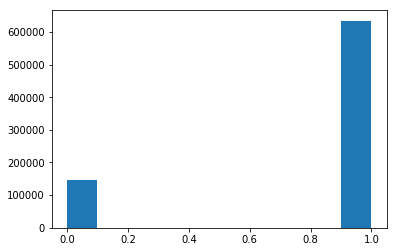

In [401]:
#Lets look for the default rate of loans in LowDoc programm.
#Seems like we find very important variable for our target goal :)
plt.hist(cond_5.MIS_Status)
plt.show()

#Near 100 000 rows with not default cases against 10 000 cases in LowDoc program
#Near 600 000 rows with not default cases against 150 000 cases in not LowDoc program

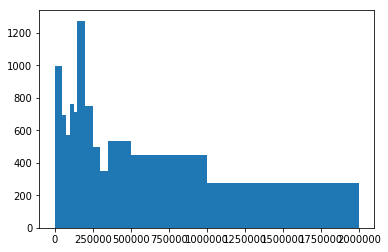

In [347]:
plt.hist(default.GrAppv, bins = [0,50000, 75000, 100000,125000,150000,200000,250000,300000, 350000,500000,1000000,2000000]) 
plt.show()

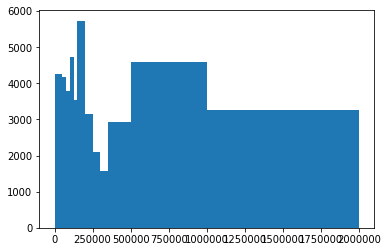

In [348]:
plt.hist(not_default.GrAppv, bins = [0,50000, 75000, 100000,125000,150000,200000,250000,300000, 350000,500000,1000000,2000000]) 
plt.show()

In [359]:
#Last thing what I want to check - NAICS (North America Classification System)
#Bad news seems like we have undefined NAICS number in data set. 201664 rows = 0
Counter(credit.LowDoc).keys()

dict_keys(['Y', 'N', 'C', '1', nan, 'S', 'R', 'A', '0'])

In [360]:
Counter(credit.LowDoc).values() #201664 rows without NAICS code

dict_values([110046, 780227, 757, 1, 2578, 603, 74, 495, 1489])

In [132]:
credit.RetainedJob >=1
credit.City.isnull()

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
899134    False
899135    False
899136    False
899137    False
899138    False
899139    False
899140    False
899141    False
899142    False
899143    False
899144    False
899145    False
899146    False
899147    False
899148    False
899149    False
899150    False
899151    False
899152    False
899153    False
899154    False
899155    False
899156    False
899157    False
899158    False
899159    False
899160    False
899161    False
899162    False
899163    False
Name: City, Length: 8971

In [125]:
credit.iloc[818075,11]

2.0

In [87]:
# Boom 115 cases from 134. Lets change it values to Existing business.
for i in temp:
    credit.iloc[i,11] = 1 #"11" -> NewExist, "1" - Existing business

ValueError: Can only index by location with a [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array]

In [58]:
credit.iloc[395231,11]

1.0

In [54]:
#Next lets check NewExist which is = 0 (1027 rows)
cond_0 = credit.loc[credit['NewExist'] == 0]
cond = cond_0.loc[cond_0['RetainedJob'] >=1]
cond
#153 rows

,LoanNr_ChkDgt,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,...,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
4664,1032044006,NEW YORK,NY,10027,EMPIRE ST. CERT. DEVEL CORP,NY,0,13-Mar-97,1997,240,...,0,N,N,17-Sep-97,194000.0,0.0,1,0.0,194000.0,194000.0
7102,1048464008,LANCASTER,MA,1464,BAY COLONY DEVEL CORP,MA,334411,19-Mar-97,1997,240,...,0,N,N,12-Nov-98,412000.0,0.0,1,0.0,412000.0,412000.0
43542,1337754008,HIALEAH GARDENS,FL,33016,FLORIDA BUS. DEVEL CORP,FL,0,11-Jun-97,1997,240,...,0,N,N,13-Aug-97,302000.0,0.0,1,0.0,302000.0,302000.0
54085,1414164002,VISTA,CA,92083,CDC SMALL BUS. FINAN CORP,CA,422430,14-Jul-97,1997,2,...,0,N,N,15-Oct-97,483000.0,0.0,1,0.0,525000.0,525000.0
62103,1468814002,INDIANAPOLIS,IN,46241,PREMIER CAPITAL CORPORATION,IN,235610,8-Aug-97,1997,240,...,0,N,N,17-Dec-97,132000.0,0.0,1,0.0,132000.0,132000.0
70090,1527664006,GRANDVIEW,MO,61030,"RURAL MISSOURI, INC.",MO,621210,4-Sep-97,1997,240,...,0,N,N,12-Aug-98,77000.0,0.0,1,0.0,77000.0,77000.0
72727,1546434002,HUDSON,MA,1749,BAY COLONY DEVEL CORP,MA,332323,12-Sep-97,1997,240,...,0,N,N,17-Mar-99,268000.0,0.0,1,0.0,268000.0,268000.0
159846,2157994007,AMLIN,OH,43002,COMMUNITY CAP. DEVEL CORP,OH,0,25-Jun-98,1998,240,...,0,N,N,16-Sep-98,370000.0,0.0,1,0.0,370000.0,370000.0
170936,2224804008,ALEXANDRIA,VA,22314,"BUSINESS FINANCE GROUP, INC.",VA,0,29-Jul-98,1998,240,...,0,N,N,15-Dec-99,509000.0,0.0,1,0.0,509000.0,509000.0
189521,2343514007,COLORADO SPRINGS,CO,80918,PIKES PEAK REGIONAL DEVEL CORP,CO,0,22-Sep-98,1998,120,...,0,N,N,17-Mar-99,364000.0,0.0,1,0.0,364000.0,364000.0


(array([5.81473e+05, 4.80480e+04, 1.03040e+04, 3.07800e+03, 2.48000e+02,
        1.15000e+02, 6.30000e+01, 5.00000e+01, 2.30000e+01, 4.10000e+01]),
 array([1.0000e+03, 5.4810e+05, 1.0952e+06, 1.6423e+06, 2.1894e+06,
        2.7365e+06, 3.2836e+06, 3.8307e+06, 4.3778e+06, 4.9249e+06,
        5.4720e+06]),
 <a list of 10 Patch objects>)

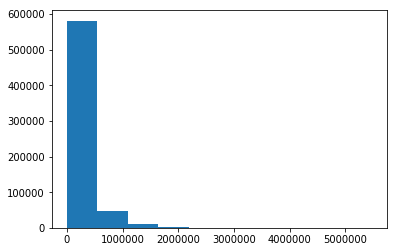

In [32]:
#Now I want to see what is "0" in New Exist feature in terms of other features.
#1 in terms of Gross Ammount Approved
#credit['NewExist'] == "0"
temp = credit.loc[credit['NewExist'] ==1]
x = temp['GrAppv']
plt.hist(x, bins = 10)

In [35]:
Counter(credit.CreateJob).keys() # unique values

dict_keys([0, 7, 30, 5, 4, 1, 20, 10, 3, 8, 16, 15, 6, 11, 2, 40, 55, 25, 12, 21, 50, 9, 13, 47, 18, 17, 14, 29, 23, 35, 43, 75, 22, 45, 27, 65, 19, 58, 48, 72, 38, 28, 24, 150, 200, 82, 68, 41, 80, 70, 33, 97, 32, 26, 34, 36, 31, 100, 56, 60, 90, 77, 99, 39, 44, 51, 120, 85, 69, 95, 42, 160, 37, 57, 600, 49, 1000, 53, 54, 46, 59, 163, 450, 456, 3000, 452, 451, 198, 79, 454, 62, 136, 64, 52, 126, 180, 74, 303, 63, 386, 78, 98, 455, 76, 152, 221, 110, 84, 153, 127, 2020, 225, 453, 125, 458, 457, 174, 104, 89, 320, 154, 300, 102, 149, 8800, 800, 130, 235, 5199, 250, 137, 500, 121, 105, 96, 360, 255, 140, 122, 175, 1200, 66, 112, 3500, 118, 220, 115, 73, 93, 151, 195, 67, 138, 400, 61, 124, 91, 1711, 131, 184, 83, 409, 1618, 1150, 88, 1530, 157, 145, 166, 135, 210, 226, 183, 3100, 252, 116, 71, 129, 223, 81, 569, 139, 144, 1011, 179, 214, 146, 171, 141, 350, 92, 101, 119, 280, 123, 205, 1229, 128, 103, 189, 114, 108, 158, 167, 87, 186, 86, 134, 1100, 750, 206, 375, 109, 433, 2140, 177, 26

In [36]:
Counter(credit.CreateJob).values() # count values 

dict_values([627610, 6374, 2038, 18679, 20493, 63005, 4479, 11597, 28776, 7373, 1437, 5399, 11005, 2077, 57753, 972, 136, 2347, 4292, 639, 930, 3330, 1825, 44, 1446, 1005, 1900, 354, 592, 766, 82, 144, 947, 301, 336, 112, 756, 37, 86, 19, 161, 442, 631, 50, 38, 15, 21, 55, 112, 112, 185, 13, 257, 363, 182, 138, 140, 261, 34, 290, 59, 11, 12, 86, 56, 27, 40, 33, 18, 20, 89, 8, 114, 26, 6, 52, 3, 41, 33, 42, 24, 1, 45, 5, 4, 16, 31, 2, 7, 8, 29, 2, 24, 30, 6, 3, 13, 1, 21, 1, 15, 14, 4, 17, 3, 2, 22, 10, 2, 1, 1, 4, 3, 27, 1, 4, 1, 3, 5, 1, 1, 11, 5, 2, 648, 1, 6, 1, 1, 12, 2, 5, 2, 11, 3, 1, 1, 10, 1, 5, 1, 15, 3, 1, 3, 3, 8, 10, 4, 2, 1, 9, 3, 2, 15, 8, 1, 1, 2, 1, 3, 1, 1, 1, 6, 1, 2, 3, 1, 11, 1, 1, 1, 1, 1, 4, 4, 1, 1, 8, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 11, 1, 2, 1, 2, 1, 1, 1, 1, 1, 3, 3, 1, 5, 4, 1, 5, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 4, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1])

In [37]:
Counter(credit.RetainedJob).keys() # unique values 

dict_keys([0, 7, 23, 4, 6, 1, 9, 20, 2, 5, 19, 8, 3, 10, 24, 12, 15, 11, 25, 44, 17, 14, 65, 28, 38, 16, 42, 26, 18, 13, 50, 93, 40, 37, 60, 21, 30, 31, 34, 35, 150, 22, 73, 41, 45, 100, 180, 58, 75, 165, 36, 130, 29, 27, 125, 99, 46, 32, 257, 43, 47, 80, 70, 54, 62, 33, 39, 400, 55, 95, 48, 120, 71, 63, 81, 52, 94, 78, 160, 109, 86, 77, 155, 85, 90, 64, 3225, 61, 69, 66, 210, 107, 97, 51, 83, 112, 53, 72, 76, 87, 68, 118, 138, 67, 57, 56, 117, 171, 229, 115, 275, 153, 300, 105, 140, 135, 59, 79, 200, 295, 205, 206, 128, 186, 137, 250, 89, 49, 131, 92, 404, 110, 320, 139, 82, 108, 88, 104, 114, 134, 230, 102, 103, 96, 98, 84, 101, 220, 233, 74, 267, 91, 9500, 355, 123, 175, 550, 500, 450, 170, 195, 116, 305, 147, 610, 187, 235, 157, 124, 127, 106, 254, 4441, 277, 225, 207, 111, 312, 317, 173, 350, 216, 143, 430, 197, 176, 145, 126, 133, 256, 2200, 362, 202, 148, 316, 8800, 215, 146, 185, 154, 212, 141, 163, 184, 5000, 3200, 132, 194, 113, 161, 172, 330, 366, 190, 1300, 390, 4000, 476, 

In [38]:
Counter(credit.RetainedJob).values() # count values 

dict_values([439969, 16480, 1355, 39551, 23730, 88264, 8719, 6315, 76554, 32523, 1534, 15667, 49796, 15409, 1417, 9556, 8434, 5693, 4105, 269, 2611, 4792, 486, 1122, 509, 3426, 483, 1080, 3364, 4459, 1573, 18, 1941, 410, 830, 1531, 3352, 497, 510, 1906, 260, 2140, 37, 229, 1109, 451, 49, 117, 396, 20, 464, 99, 565, 968, 100, 26, 216, 861, 4, 321, 239, 414, 469, 134, 131, 487, 245, 14, 534, 112, 361, 171, 53, 112, 40, 247, 20, 58, 52, 12, 37, 52, 17, 202, 242, 70, 1, 76, 35, 60, 9, 17, 27, 154, 41, 12, 137, 83, 45, 25, 101, 15, 10, 68, 98, 128, 14, 2, 2, 48, 12, 2, 46, 89, 76, 46, 58, 43, 103, 2, 9, 2, 17, 4, 10, 44, 33, 157, 9, 42, 1, 138, 6, 7, 70, 21, 41, 16, 12, 8, 12, 29, 22, 30, 40, 31, 17, 17, 2, 49, 2, 23, 1, 1, 11, 31, 4, 14, 15, 29, 3, 15, 1, 9, 1, 2, 5, 4, 8, 16, 15, 4, 1, 2, 14, 5, 9, 1, 1, 4, 17, 3, 7, 1, 5, 3, 24, 9, 5, 3, 1, 4, 2, 4, 2, 648, 4, 5, 20, 4, 4, 15, 4, 4, 1, 1, 5, 4, 9, 2, 8, 2, 1, 16, 1, 2, 2, 1, 1, 1, 1, 6, 1, 12, 17, 8, 4, 2, 2, 2, 1, 8, 2, 6, 1, 1, 1, 7, 4

In [692]:
#Plotting the histogram of GrAppv

x = credit['GrAppv']
n_bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
colors = {'P I F':'r', 'CHGOFF':'b'}
colors = {'True':'r', 'False':'b'}

In [638]:
plt.hist(x, n_bins, color=[colors[i] for i in np.unique(credit['MIS_Status'])])

KeyError: False

In [635]:
credit['MIS_Status'].values

array([ True,  True,  True, ...,  True,  True,  True])

In [631]:
from scipy.stats import skew
print (skew(x))

3.5207758469825055


0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
899134    False
899135    False
899136    False
899137    False
899138    False
899139    False
899140    False
899141    False
899142    False
899143    False
899144    False
899145    False
899146    False
899147    False
899148    False
899149    False
899150    False
899151    False
899152    False
899153    False
899154    False
899155    False
899156    False
899157    False
899158    False
899159    False
899160    False
899161    False
899162    False
899163    False
Name: MIS_Status, Length

In [489]:
#Function which returns min and max for selected columns
def min_max_value(col):
    top = credit[col].idxmax()
    top_obs = pd.DataFrame(credit.loc[top])
    
    bottom = credit[col].idxmin()
    bot_obs = pd.DataFrame(credit.loc[bottom])

    min_max_obs = pd.concat([top_obs, bot_obs], axis =1)
    
    return min_max_obs

In [500]:
#Check min and max values of some Currency features.
min_max_value('GrAppv')
#min_max_value('SBA_Appv')
#min_max_value('ChgOffPrinGr')
#min_max_value('DisbursementGross')
#min_max_value("BalanceGross")

,452398,39185
LoanNr_ChkDgt,4386445005,1302785002
City,Bloomfield hills,SPRINGFIELD
State,MI,MA
Zip,48304,1104
Bank,SBA DENVER FINANCE CENTER,CITIZENS BANK NATL ASSOC
BankState,CO,RI
NAICS,541110,561720
ApprovalDate,24-Nov-10,13-May-05
ApprovalFY,2011,2005
Term,240,84


In [447]:
#Function which returns min and max for selected columns
def min_max_value(col):
    top = credit[col].idxmax()
    top_obs = pd.DataFrame(credit.loc[top])
    
    bottom = credit[col].idxmin()
    bot_obs = pd.DataFrame(credit.loc[bottom])

    min_max_obs = pd.concat([top_obs, bot_obs], axis =1)
    
    return min_max_obs


In [19]:
con = credit[(credit['MIS_Status'] == 'P I F')] #1557558 Default and 739609 Paid
Counter(con.ChgOffPrinGr).keys() # unique values
con[(con['ChgOffPrinGr']== 26902.0)]